In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [79]:
internal_std = 0.12020815280171308
alpha, beta = 0.33161042682148745, -3.118581197040526
tp = 2.3705776338361453
std=  0.6494906579630186
var = 0.42183811478123484
mean = -4.665813654468274

In [80]:
"""length = 1000
size_1 = np.arange(-10, 10, 0.5)

std_1 = 0.2
size_2 = np.arange(-10, 10, 1)
std_2 = 1

rows = []

for j in range(len(size_2)):
    for i in size_1:
        for _ in range(length):
            rows.append([j, i, std_1, size_2[j], std_2])

df = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])

filename = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\test_complet_p4_plot_mean.csv"
df.to_csv(filename, index=False)

print("Fichier généré :", filename)
"""

'length = 1000\nsize_1 = np.arange(-10, 10, 0.5)\n\nstd_1 = 0.2\nsize_2 = np.arange(-10, 10, 1)\nstd_2 = 1\n\nrows = []\n\nfor j in range(len(size_2)):\n    for i in size_1:\n        for _ in range(length):\n            rows.append([j, i, std_1, size_2[j], std_2])\n\ndf = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])\n\nfilename = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\test_complet_p4_plot_mean.csv"\ndf.to_csv(filename, index=False)\n\nprint("Fichier généré :", filename)\n'

In [81]:
file = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\answers_evo_mean\\experiment_results_100.csv"

inverser = True   
    

In [82]:
def info(file_path):
    df = pd.read_csv(file_path)
    nb_psycho = df['S2_val'].to_numpy()
    nb_psycho = pd.unique(nb_psycho)   #11
    len_block = df['S1_val'].to_numpy() #41
    len_block = pd.unique(len_block) 
    s1_0 = df['S1_val'].iloc[0]
    s2_0 = df['S2_val'].iloc[0]
    nb_iteration = df[(df['S1_val'] == s1_0) & (df['S2_val'] == s2_0)].shape[0]
    return len(list(len_block)),len(list(nb_psycho)), nb_iteration

def psychometric_curves(data_tuple, len_block, nb_psycho, nb_iteration):
    result, mean_used = data_tuple
    
    all_psychos = []  # liste de [ [moyennes pour chaque S1_val] pour chaque psycho ]
    all_means = []    # idem pour mean_used
    iteration_block = nb_iteration*len_block
    for psycho in range(nb_psycho):   # si tu veux toutes les courbes
        true_array_result = []
        true_array_mean_used = []
        
        for i in range(len_block):
            # indices de début/fin pour ce (psycho, i)
            start = iteration_block * psycho + nb_iteration * i
            end   = start + nb_iteration

            # bloc de result
            block_r = result[start:end]
            mean_r = sum(block_r) / len(block_r)
            true_array_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[start:end]
            mean_m = sum(block_m) / len(block_m)
            true_array_mean_used.append(mean_m)

        all_psychos.append(true_array_result)
        all_means.append(true_array_mean_used)
    
    return all_psychos, all_means

def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    return data_tuple
 
def calculate_xstars(mean_used_all, mean_res_all):
    """
    Renvoie uniquement les x_star (croisements avec 0.5)
    sans tracer les courbes.
    """

    seuil = 0.5
    x_stars = []

    #print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        """if x_cross is not None:
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')"""

        x_stars.append(x_cross)

    return x_stars

 
def main(file_path, inverser):
    data_tuple = reading_csv(file_path, inverser=inverser)
    len_block ,nb_psycho, nb_iteration = info(file_path)
    array_mean_result, array_mean_used = psychometric_curves(data_tuple, len_block, nb_psycho, nb_iteration)
    x_stars = []
    for i in range(len(array_mean_result)):
        x_star = calculate_xstars(array_mean_used, array_mean_result)
        x_stars.append(x_star)
    return x_stars

x_stars = main(file_path=file , inverser=inverser)
print("x_stars from main :", x_stars)



x_stars from main : [[-4.291519434628976, -3.992619926199262, -3.595486111111111, -3.3333333333333335, -2.949324324324324, -2.6338028169014085, -2.300675675675676, -1.935430463576159, -1.6094339622641511, -1.3053691275167785, -0.9791666666666666, -0.6375404530744336, -0.326158940397351, 0.0597014925373134, 0.36397058823529416, 0.6820987654320988, 0.9916943521594684, 1.3205980066445182, 1.689419795221843, 1.9764309764309764], [-4.291519434628976, -3.992619926199262, -3.595486111111111, -3.3333333333333335, -2.949324324324324, -2.6338028169014085, -2.300675675675676, -1.935430463576159, -1.6094339622641511, -1.3053691275167785, -0.9791666666666666, -0.6375404530744336, -0.326158940397351, 0.0597014925373134, 0.36397058823529416, 0.6820987654320988, 0.9916943521594684, 1.3205980066445182, 1.689419795221843, 1.9764309764309764], [-4.291519434628976, -3.992619926199262, -3.595486111111111, -3.3333333333333335, -2.949324324324324, -2.6338028169014085, -2.300675675675676, -1.935430463576159, 

In [83]:
def compute_tau_p(alpha, tau_test, tau_ref):
    numerator = tau_test * tau_ref * (1 - alpha)
    denominator = alpha * tau_test - tau_ref
    return numerator / denominator

def compute_mu_p(tp, tref, ttest, beta):
    val = (tp * (ttest - tref)) / (ttest*(tref + tp))
    return beta / val
    

In [84]:
internal_std = 0.12020815280171308
alpha, beta = 0.33161042682148745, -3.118581197040526
tp = 2.3705776338361453
std=  0.6494906579630186
var = 0.42183811478123484
mean = -4.665813654468274

For  0  trials :
std=  0.6493977365659902
mean = -4.664278236439348
For  25  trials :
std=  0.6479352032353373
mean = -1.6967945416633559
For  50  trials :
std=  0.6491332852764717
mean = -1.475958631161971
For  100  trials :
std=  0.6503308319693025
mean = -0.9636457917821172
For  150  trials :
std=  0.6494112090815367
mean = -0.969107567159274
For  200  trials :
std=  0.6487048702045539
mean = -0.807301554522573
For  300  trials :
std=  0.6497564074320185
mean = -0.8712952121476235
For  500  trials :
std=  0.6498289514633021
mean = -0.8793040599852396
For  1000  trials :
std=  0.6498289514633021
mean = -0.8793040599852396


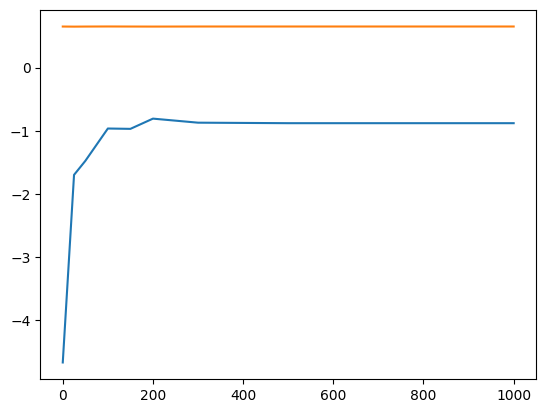

In [87]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def find_mean_std(x_stars):
    vals =  np.arange(-10, 10, 1)
    X = np.array(vals).reshape(-1, 1)
    for i in range(len(x_stars)):
        y = np.array(x_stars[i])
        reg = LinearRegression().fit(X, y)

        a = reg.coef_[0]       # pente
        b = reg.intercept_     # offset
        a = reg.coef_[0]       # pente
        b = reg.intercept_  
        std_t = 0.2
        std_r = 1
        internal_std = 0.12020815280171308
        ttest = 1/((std_t)**2 + internal_std**2)
        tref = 1/((std_r)**2 + internal_std**2)
        alpha = a
        beta = b
        tp = compute_tau_p(alpha, ttest, tref)
        mean = compute_mu_p(tp, tref, ttest, beta)
        print("std= " , (1/(tp**0.5)))
        print("mean =", mean)
        return mean, (1/(tp**0.5))
    

        
val = [0,25,50,100,150,200,300,500,1000]
means = []
stds = []
for v in val:
    file = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\answers_evo_mean\\experiment_results_" + str(v) + ".csv"
    inverser = True   
    x_stars = main(file_path=file , inverser=inverser)
    print("For ", v, " trials :")
    mean,std = find_mean_std(x_stars)
    means.append(mean)
    stds.append(std)
plt.plot(val, means)
plt.plot(val, stds)